In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams['figure.figsize'] = [20, 10]

# Transposed Network init

* **G** is the network with nodes labeled from 1 to 34. This format will be useful for working with *gTries*.
* **H** is the same network with node labels replaced with the actual species/species group. It allows for easier interpretation of the results.
* weighted/unweighted comparisons can be done with the same network (typically **H**) as long as the 'weight' parameter is kept in check.

In [3]:
rede = pd.read_csv('project_nw.csv', delimiter= ';', header= None)
rede = pd.DataFrame.to_numpy(rede)
G = nx.from_numpy_matrix(rede.transpose(), create_using= nx.DiGraph)

# adjust nodes for gtries:
mapping = {i: i+1 for i in range(0,34)}
G = nx.relabel_nodes(G, mapping, copy=True)

# fancy labels:
labels =  {1: 'Seabirds',
           2: 'Minkle_whale',
           3: 'Common_dolphin',
           4: 'Striped_dolphin',
           5: 'Bottlenose_dolphin',
           6: 'Harbor_porpoise',
           7: 'Tunas',
           8: 'Rays',
           9: 'Hake',
           10: 'Squids',
           11: 'Benthic_cephalopods',
           12: 'Horse_mackerel',
           13: 'Blue_jack_mackerel',
           14: 'Chub_mackerel',
           15: 'Mackerel',
           16: 'Demersal_piscivorous_fish',
           17: 'Demersal_invertivorous_fish',
           18: 'Benthopelagic_piscivorous_fish',
           19: 'Benthopelagic_invertivorous_fish',
           20: 'Flatfish',
           21: 'Sparids',
           22: 'Anchovy',
           23: 'Sardine',
           24: 'Bogue',
           25: 'Henslows_crab',
           26: 'Shrimps',
           27: 'Macrozoobenthos',
           28: 'Suprabenthic_invertebrates',
           29: 'Macrozooplankton',
           30: 'Meso_and_Microzooplankton',
           31: 'Phytoplankton',
           32: 'Discards',
           33: 'Detritus',
           34: 'Import'}

H = nx.relabel_nodes(G, labels, copy=True)

In [11]:
np.savetxt("project_network_transp.csv", rede.transpose(), delimiter=";")

Enumerating the edges and respective weights:

In [4]:
G.edges(data = True)

OutEdgeDataView([(9, 1, {'weight': 0.1}), (9, 3, {'weight': 0.042}), (9, 4, {'weight': 0.1}), (9, 5, {'weight': 0.084}), (9, 6, {'weight': 0.152}), (9, 8, {'weight': 0.012}), (9, 9, {'weight': 0.02}), (9, 10, {'weight': 0.01}), (9, 16, {'weight': 0.016}), (9, 18, {'weight': 0.017}), (9, 20, {'weight': 0.001}), (10, 1, {'weight': 0.01}), (10, 3, {'weight': 0.047}), (10, 4, {'weight': 0.139}), (10, 5, {'weight': 0.003}), (10, 6, {'weight': 0.003}), (10, 7, {'weight': 0.01}), (10, 8, {'weight': 0.093}), (10, 9, {'weight': 0.01}), (10, 10, {'weight': 0.05}), (10, 12, {'weight': 0.005}), (10, 13, {'weight': 0.01}), (10, 14, {'weight': 0.02}), (10, 15, {'weight': 0.01}), (10, 16, {'weight': 0.008}), (10, 18, {'weight': 0.019}), (10, 19, {'weight': 0.002}), (10, 20, {'weight': 0.081}), (10, 21, {'weight': 0.051}), (10, 25, {'weight': 0.03}), (11, 3, {'weight': 0.008}), (11, 4, {'weight': 0.037}), (11, 5, {'weight': 0.011}), (11, 6, {'weight': 0.001}), (11, 8, {'weight': 0.021}), (11, 10, {'we

In [5]:
print(f'number of nodes in the network: {H.number_of_nodes()}')
print(f'number of edges in the network: {H.number_of_edges()}')

number of nodes in the network: 34
number of edges in the network: 284


# Network Viz

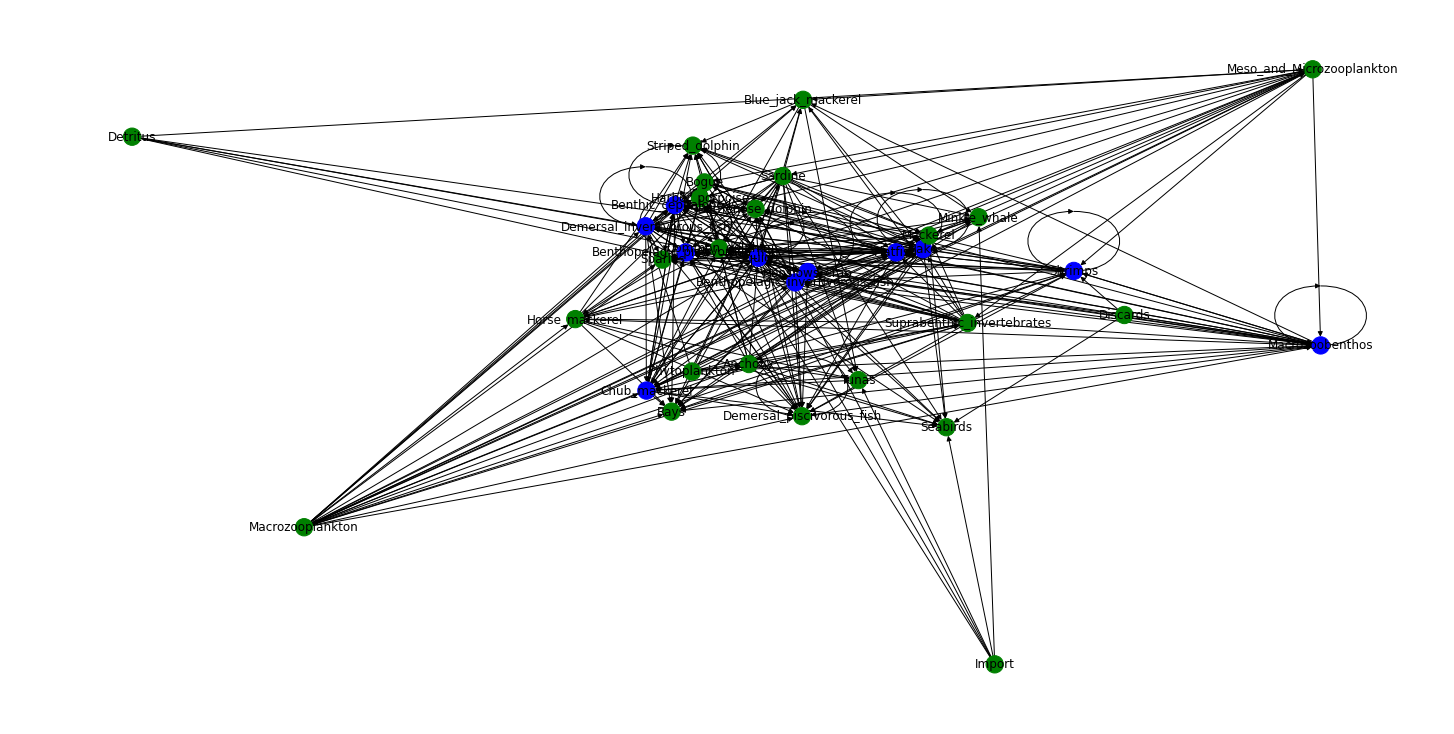

In [6]:
d = nx.betweenness_centrality(H, weight=None)
color = ['blue' if i>0.01 else 'green' for i in d.values()]

pos = nx.kamada_kawai_layout(H)
nx.draw(H, pos = pos, node_color = color, with_labels=True)

In [14]:
nx.write_gexf(H, "rede_gephi_inv.gexf", version="1.2draft")

# Connectivity

In [7]:
print(f'is the undirected version of G fully connected? {nx.is_connected(G.to_undirected())}')
print(f'is G strongly connected? {nx.is_strongly_connected(G)}')
print(f'is G weakly connected? {nx.is_weakly_connected(G)}')
print(f'number of weakly connected components: {nx.number_weakly_connected_components(G)}')

is the undirected version of G fully connected? True
is G strongly connected? False
is G weakly connected? True
number of weakly connected components: 1


# Distance Metrics

In [8]:
dist = dict(nx.all_pairs_shortest_path_length(G))

# sum of all shortest distances in the network:
res = 0
for item in dist:
    #print(dist[item])
    #print(dist[item].values())
    h = sum(dist[item].values())
    res += h

print(f"sum of all non-infinite distances:{res}")
print(f"average non-infinite path length:{res/(34*33)}")

sum of all non-infinite distances:973
average non-infinite path length:0.8672014260249554


In [17]:
#print(f"The diameter of this network is {nx.diameter(G)}")
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
diameter_w = max([max(j.values()) for (i,j) in nx.shortest_path_length(G, weight='weight')])
print(f"The diameter of this network is {diameter}")
print(f"The weighted diameter of this network is {diameter_w}")
print(f"average shortest path length is {nx.average_shortest_path_length(G, weight=None)}")
print(f"average shortest path length with weights is {nx.average_shortest_path_length(G, weight='weight')}")

print(f"average shortest path length (undirected) is {nx.average_shortest_path_length(G.to_undirected(), weight=None)}")
print(f"average shortest path length with weights (undirected) is {nx.average_shortest_path_length(G.to_undirected(), weight='weight')}")


The diameter of this network is 5
The weighted diameter of this network is 0.95
average shortest path length is 0.8672014260249554
average shortest path length with weights is 0.021508021390374336
average shortest path length (undirected) is 1.572192513368984
average shortest path length with weights (undirected) is 0.014901960784313696


In [20]:
nx.shortest_path(G,16,2)
nx.shortest_path(H, 'Demersal_piscivorous_fish', 'Minkle_whale')

['Demersal_piscivorous_fish',
 'Benthopelagic_piscivorous_fish',
 'Hake',
 'Squids',
 'Horse_mackerel',
 'Minkle_whale']

In [21]:
nx.dag_longest_path(H)

NetworkXUnfeasible: Graph contains a cycle or graph changed during iteration

In [22]:
dict(nx.all_pairs_dijkstra(G, weight = 'weight'))

{1: ({1: 0}, {1: [1]}),
 2: ({2: 0}, {2: [2]}),
 3: ({3: 0}, {3: [3]}),
 4: ({4: 0}, {4: [4]}),
 5: ({5: 0}, {5: [5]}),
 6: ({6: 0}, {6: [6]}),
 7: ({7: 0}, {7: [7]}),
 8: ({8: 0}, {8: [8]}),
 9: ({9: 0,
   20: 0.001,
   3: 0.004,
   10: 0.01,
   8: 0.012,
   19: 0.012,
   5: 0.013000000000000001,
   6: 0.013000000000000001,
   12: 0.015,
   16: 0.016,
   18: 0.017,
   1: 0.02,
   7: 0.02,
   13: 0.02,
   15: 0.02,
   2: 0.022,
   4: 0.025,
   11: 0.027,
   17: 0.028999999999999998,
   14: 0.03,
   21: 0.034,
   25: 0.04},
  {9: [9],
   1: [9, 10, 1],
   3: [9, 20, 3],
   4: [9, 10, 13, 4],
   5: [9, 10, 5],
   6: [9, 10, 6],
   8: [9, 8],
   10: [9, 10],
   16: [9, 16],
   18: [9, 18],
   20: [9, 20],
   11: [9, 10, 19, 11],
   21: [9, 20, 21],
   7: [9, 10, 7],
   12: [9, 10, 12],
   13: [9, 10, 13],
   14: [9, 10, 14],
   15: [9, 10, 15],
   19: [9, 10, 19],
   25: [9, 10, 25],
   2: [9, 10, 15, 2],
   17: [9, 10, 19, 11, 17]}),
 10: ({10: 0,
   19: 0.002,
   5: 0.003,
   6: 0.003,


# Degree Distribution

Degree of each node: [(1, 11), (2, 9), (3, 14), (4, 13), (5, 13), (6, 12), (7, 7), (8, 14), (9, 25), (10, 35), (11, 26), (12, 16), (13, 12), (14, 23), (15, 14), (16, 22), (17, 26), (18, 20), (19, 26), (20, 22), (21, 13), (22, 14), (23, 21), (24, 13), (25, 16), (26, 21), (27, 24), (28, 23), (29, 21), (30, 17), (31, 9), (32, 4), (33, 6), (34, 6)]


Text(0, 0.5, 'Frequency')

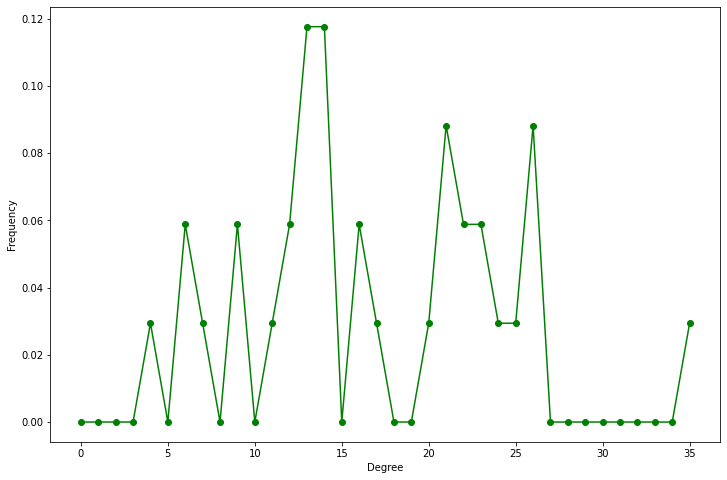

In [9]:
print(f"Degree of each node: {nx.degree(G)}")

degree_freq = nx.degree_histogram(G)
degree_norm = []
for i in degree_freq:
    degree_norm.append(i/sum(degree_freq))

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.plot(degrees, degree_norm,'go-')
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [10]:
graus = pd.DataFrame({'node': pd.Series(dtype='str'),
                      'group': pd.Series(dtype='str'),
                      'degree': pd.Series(dtype='int'),
                      'in_degree': pd.Series(dtype='int'),
                      'out_degree': pd.Series(dtype='int')})

graus['node'] = G.nodes
graus['group'] = H.nodes
graus['degree'] = [k[1] for k in G.degree]
graus['in_degree'] = [k[1] for k in G.in_degree]
graus['out_degree'] = [k[1] for k in G.out_degree]

In [12]:
with open('outputs/degrees_t.tex','w') as tf:
    tf.write(graus.to_latex(index=False))

graus

,node,group,degree,in_degree,out_degree
1,1,Seabirds,11,11,0
2,2,Minkle_whale,9,9,0
3,3,Common_dolphin,14,14,0
4,4,Striped_dolphin,13,13,0
5,5,Bottlenose_dolphin,13,13,0
6,6,Harbor_porpoise,12,12,0
7,7,Tunas,7,7,0
8,8,Rays,14,14,0
9,9,Hake,25,14,11
10,10,Squids,35,16,19


##  Degree distribution

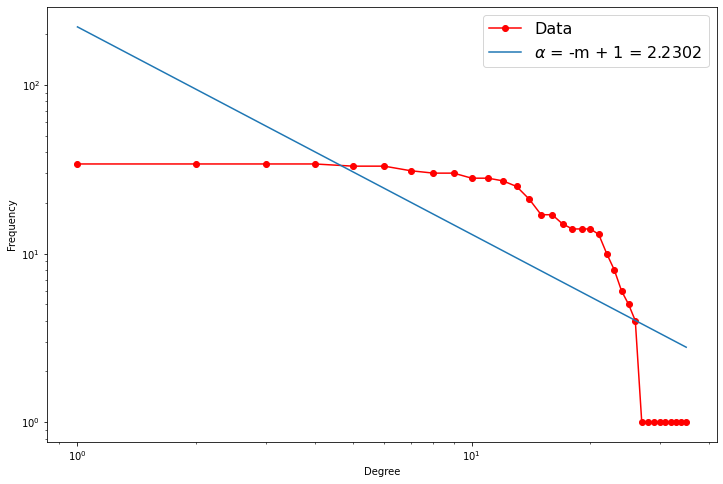

In [13]:
degree_freq = nx.degree_histogram(G)
degrees = range(1, len(degree_freq))
y = []
for i in range(1,len(degree_freq)):
    new_value = np.sum(degree_freq) - (np.cumsum(degree_freq))[i-1]
    y.append(new_value)

model = LinearRegression()
model.fit(np.array(np.log(degrees)).reshape(-1,1), np.log(y))

plt.figure(figsize=(12, 8))
plt.loglog(degrees, y,'ro-', label = 'Data')
plt.loglog(degrees,  np.exp(model.coef_*np.log(degrees) + model.intercept_), label = fr'$\alpha$ = -m + 1 = {np.round(-model.coef_,4).item()+1}')
#plt.xlim([1,70])
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc='upper right', prop={'size': 16})


# Clustering Coefficient
## Unweighted

In [14]:
d = nx.clustering(H, weight=None)

cl_u = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'clustering_coefficient': pd.Series(dtype='float')})

cl_u['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
cl_u['clustering_coefficient'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/clu_un_t.tex','w') as tf:
    tf.write(cl_u[cl_u['clustering_coefficient']>0].to_latex(index=False))

In [15]:
cl_u[cl_u['clustering_coefficient']>0]

,node,clustering_coefficient
0,Detritus,0.500000
1,Rays,0.434066
2,Sparids,0.421053
3,Flatfish,0.409574
4,Benthopelagic_piscivorous_fish,0.394040
5,Henslows_crab,0.383333
6,Phytoplankton,0.361111
7,Demersal_piscivorous_fish,0.357143
8,Benthic_cephalopods,0.349265
9,Harbor_porpoise,0.348485


## Weighted

In [22]:
d = nx.clustering(H, weight='weight')

cl_w = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'clustering_coefficient': pd.Series(dtype='float')})

cl_w['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
cl_w['clustering_coefficient'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/clu_w_t.tex','w') as tf:
    tf.write(cl_w[cl_w['clustering_coefficient']>0].to_latex(index=False))

In [17]:
cl_w[cl_w['clustering_coefficient']>0]

,node,clustering_coefficient
0,Detritus,0.086836
1,Phytoplankton,0.040915
2,Meso_and_Microzooplankton,0.038987
3,Macrozooplankton,0.032525
4,Macrozoobenthos,0.028941
5,Shrimps,0.028635
6,Rays,0.025446
7,Suprabenthic_invertebrates,0.023182
8,Sparids,0.022603
9,Benthopelagic_invertivorous_fish,0.022601


In [18]:
print(f'the global clustering coefficient (unweighted) is {nx.average_clustering(H, weight = None)}')
print(f'the global clustering coefficient (weighted) is {nx.average_clustering(H, weight="weight")}')

the global clustering coefficient (unweighted) is 0.29992317971919646
the global clustering coefficient (weighted) is 0.019913510012133318


# Betwenness Centrality:

## Unweighted network:

In [20]:
d = nx.betweenness_centrality(H, weight=None)

bc_u = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'betweeness_centrality': pd.Series(dtype='float')})

bc_u['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
bc_u['betweeness_centrality'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/bc_un_t.tex','w') as tf:
    tf.write(bc_u[bc_u['betweeness_centrality']>0].to_latex(index=False))

In [24]:
bc_u[bc_u['betweeness_centrality']>0]

,node,betweeness_centrality
0,Squids,0.110718
1,Hake,0.073885
2,Benthic_cephalopods,0.020195
3,Benthopelagic_piscivorous_fish,0.019852
4,Demersal_invertivorous_fish,0.017623
5,Macrozoobenthos,0.016453
6,Flatfish,0.015417
7,Benthopelagic_invertivorous_fish,0.012778
8,Chub_mackerel,0.011769
9,Shrimps,0.011217


## Weighted network:

In [25]:
d = nx.betweenness_centrality(H, weight='weight')

bc_w = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'betweeness_centrality': pd.Series(dtype='float')})

bc_w['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
bc_w['betweeness_centrality'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/bc_we_t.tex','w') as tf:
    tf.write(bc_w[bc_w['betweeness_centrality']>0].to_latex(index=False))

In [26]:
bc_w[bc_w['betweeness_centrality']>0]

,node,betweeness_centrality
0,Squids,0.231061
1,Hake,0.160985
2,Blue_jack_mackerel,0.039299
3,Benthic_cephalopods,0.038826
4,Benthopelagic_invertivorous_fish,0.034091
5,Demersal_invertivorous_fish,0.033144
6,Flatfish,0.031250
7,Mackerel,0.028409
8,Anchovy,0.024148
9,Benthopelagic_piscivorous_fish,0.022727


# Closeness Centrality

In [29]:
d = nx.closeness_centrality(H)

cc_u = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'closeness_centrality': pd.Series(dtype='float')})

cc_u['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
cc_u['closeness_centrality'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/cc_un_t.tex','w') as tf:
    tf.write(cc_u[cc_u['closeness_centrality']>0].to_latex(index=False))

In [30]:
cc_u[cc_u['closeness_centrality']>0]

,node,closeness_centrality
0,Demersal_piscivorous_fish,0.563050
1,Benthopelagic_piscivorous_fish,0.528926
2,Squids,0.513369
3,Bottlenose_dolphin,0.512121
4,Common_dolphin,0.511876
5,Rays,0.511876
6,Striped_dolphin,0.499630
7,Harbor_porpoise,0.499630
8,Hake,0.498701
9,Seabirds,0.487734


In [44]:
d = nx.pagerank(H, weight= 'weight')

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

# Pagerank
# weigth

In [32]:
d = nx.pagerank(H, weight= 'weight')

pr_w = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'pagerank': pd.Series(dtype='float')})


pr_w['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
pr_w['pagerank'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/pr_w_t.tex','w') as tf:
    tf.write(pr_w[pr_w['pagerank']>0].to_latex(index=False))

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

In [296]:
pr_w

,node,pagerank
0,Phytoplankton,0.143850
1,Meso_and_Microzooplankton,0.128281
2,Detritus,0.090720
3,Macrozooplankton,0.058699
4,Macrozoobenthos,0.053149
5,Suprabenthic_invertebrates,0.051506
6,Sardine,0.042411
7,Benthopelagic_invertivorous_fish,0.035806
8,Shrimps,0.029005
9,Demersal_invertivorous_fish,0.028086


# Unweighted

In [297]:
d = nx.pagerank(H, weight= None)

pr_u = pd.DataFrame({'node': pd.Series(dtype='str'),
                   'pagerank': pd.Series(dtype='float')})

pr_u['node'] = [k for k in sorted(d, key=d.get, reverse=True)]
pr_u['pagerank'] = [d[k] for k in sorted(d, key=d.get, reverse=True)]

with open('outputs/pr_u_t.tex','w') as tf:
    tf.write(pr_u[pr_u['pagerank']>0].to_latex(index=False))

In [298]:
pr_u

,node,pagerank
0,Phytoplankton,0.123184
1,Meso_and_Microzooplankton,0.097845
2,Detritus,0.077292
3,Macrozooplankton,0.063477
4,Suprabenthic_invertebrates,0.052948
5,Macrozoobenthos,0.045245
6,Shrimps,0.037437
7,Squids,0.036845
8,Sardine,0.035445
9,Demersal_invertivorous_fish,0.031540


# gTries

 ./gTrieScanner -s 3 -d -m esu -g rede_fw.txt -f simple
 ./gTrieScanner -s 3 -d -m gtrie dir3.gt -g rede_fw.txt
 ./gTrieScanner -s 3 -d -m gtrie dir3.gt -g rede_fw.txt -r 500 -raw

 ./gTrieScanner -s 4 -d -m esu -g rede_fw.txt -f simple
 ./gTrieScanner -s 4 -d -m gtrie dir4.gt -g rede_fw.txt
 ./gTrieScanner -s 4 -d -m gtrie dir4.gt -g rede_fw.txt -r 500 -raw

In [29]:
with open('outputs/rede_fw_t.txt', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for item in G.edges:
            spamwriter.writerow(item)

In [46]:
def z_norm(df):
    z_list = df[' z_score'].tolist()
    z_squared = [i**2 for i in z_list]
    normalized = [i / np.sum(z_squared)**0.5 for i in z_list]
    return normalized

types = dtype = {'adjmatrix': str,
                 'circuit1.columns': float,
                 ' z_score': float,
                 ' avg_random': float,
                 ' stdev_random': float}

## Size-3 Subgraphs:

In [28]:
nx.transitivity(G)

0.2955242182709994

In [47]:
valores = [
    ['000100100', 306, 5.90, 200.38, 17.91],
    ['001100000', 585, 4.35, 427.20 , 36.31],
    ['001100010', 82, 7.28, 32.41, 6.81],
    ['010100100', 21,-5.23,108.13, 16.65],
    ['010100110', 4 , -2.32, 11.32, 3.15],
    ['011000000',  298, 6.66,186.81,16.71],
    ['011001000', 134, 3.96, 78.73,13.91],
    ['011100000', 12,-5.74,103.06,15.88],
    ['011100010', 3,-4.40, 24.51, 5.89],
    ['011100100', 0,0 , 0.00,0.00],
    ['011101000', 2,-2.82, 10.96, 3.17],
    ['011101100', 0,0, 0.00 ,0.00],
    ['011101110', 0,0,0.00 , 0.00]]

gtrie3 = pd.DataFrame(valores, columns=['Graph',  'Org_Freq', ' z_score', 'Rnd_Avg',  'Rnd_Dev'])
gtrie3 = gtrie3.assign(z_n = z_norm(gtrie3))

with open('outputs/gtries_3_t_table.tex','w') as tf:
    tf.write(gtrie3.to_latex(index=False))

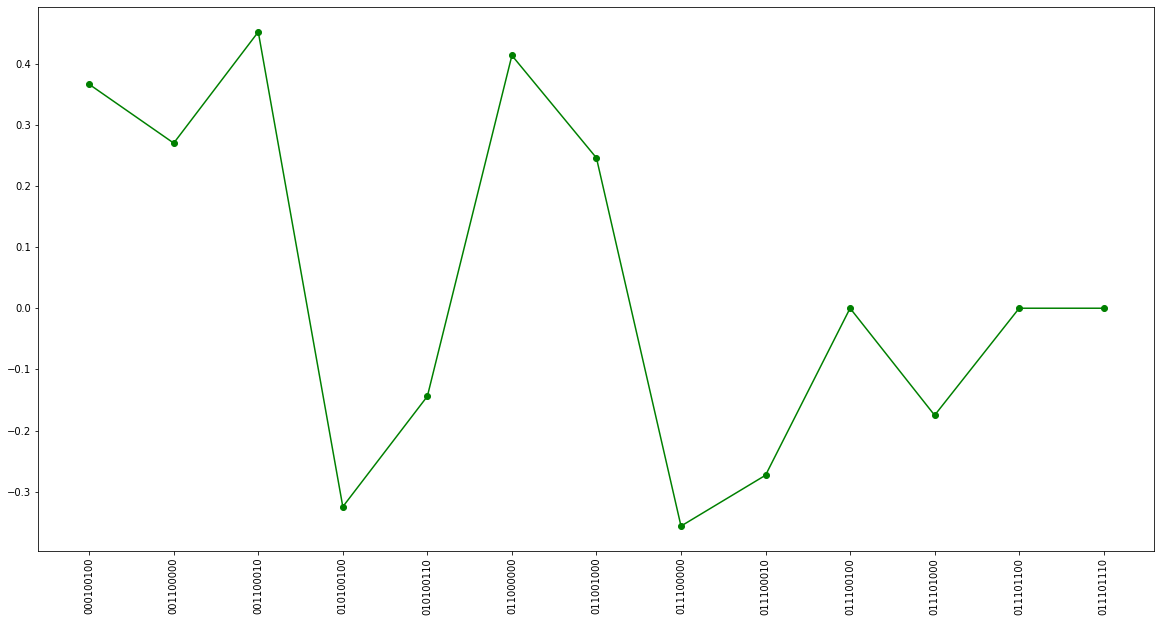

In [48]:
plt.xticks(rotation=90)
plt.plot(gtrie3['Graph'], gtrie3['z_n'], 'go-', label = 'Subgraph (n=3)')

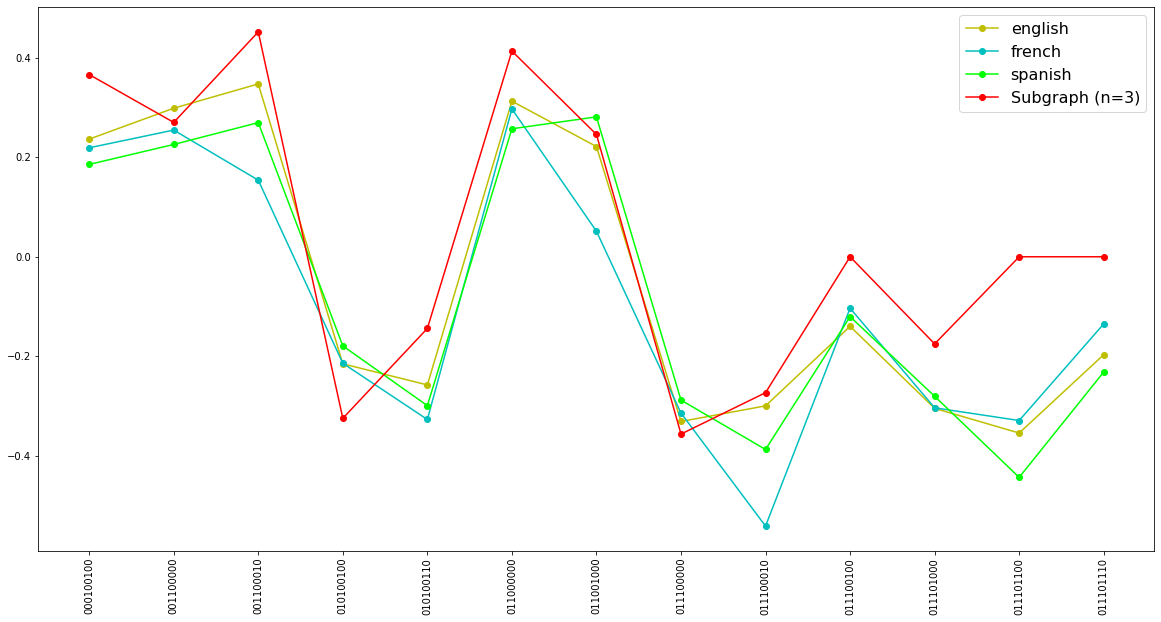

In [50]:
english = pd.read_csv('inputs/raw_english.txt', dtype = types)
english = english.assign(z_n = z_norm(english))

french = pd.read_csv('inputs/raw_french.txt', dtype = types)
french = french.assign(z_n = z_norm(french))

spanish = pd.read_csv('inputs/raw_spanish.txt', dtype = types)
spanish = spanish.assign(z_n = z_norm(spanish))

plt.xticks(rotation=90)
plt.plot(english['adjmatrix'], english['z_n'], 'yo-', label = 'english')
plt.plot(french['adjmatrix'], french['z_n'], 'co-', label = 'french')
plt.plot(spanish['adjmatrix'], spanish['z_n'], 'lime', linestyle = '-', marker = 'o', label = 'spanish')
plt.plot(gtrie3['Graph'], gtrie3['z_n'], 'ro-', label = 'Subgraph (n=3)')
plt.legend(loc='upper right', prop={'size': 16})

## Size-4 Subgraphs

In [52]:
valores_4 = [
['0011100001000100',  170 , 16.37 ,  19.92 ,9.17],
['0110000000000110',  103 , 9.85 ,  27.31 ,7.68],
['0101000111000010',   55 , 8.53 , 8.98, 5.40],
['0111000001000100',   54 , 7.25 ,  14.31 ,5.48],
['0110000100010000',  187 , 7.66 ,  70.43,15.21],
['0101001010000000',  508 , 7.59 , 181.36,43.03],
['0011100101000000',  118 , 6.82 ,  34.95,12.18],
['0100001010001000',  517 , 7.20 , 191.28,45.27],
['0111000000000000',  264 , 7.06 , 113.02,21.40],
['0001100011000100',  116 , 6.55 ,  36.79,12.10],
['0000100110000000', 1134 , 5.97 , 671.22,77.58],
['0110000100000010',  306 , 5.75 , 141.31,28.63],
['0010100101001000',  109 , 4.91 ,  41.24,13.79],
['0111001100000000',   40 , 5.28 ,  12.66 ,5.17],
['0111001000000000',  271 , 4.96 , 130.76,28.28],
['0000100010001000',  282 , 5.37 , 142.84,25.90],
['0001100010000000',  822 , 5.03 , 468.48,70.33],
['0101000011000100',   83 , 4.51 ,  32.04,11.31],
['0011100000000000',  760 , 4.61 , 445.86,68.15],
['0111000101000000',   74 , 4.31 ,  28.81 ,10.48],
['0101000111000000',   83 , 4.51 ,  32.04,11.31],
['0111001100010000',   24 , 4.45  ,6.18 ,4.01],
['0000101010001000',  293 , 4.28 , 153.79,32.49],
['0110001000001000',  320 , 3.78 , 171.17,39.37],
['0100000011001100',   38 , 4.01 ,  14.49 ,5.87],
['0011101000000000',  255 , 3.36 , 147.98,31.82],
['0010100100000000', 1027 , 3.76 , 724.51,80.35],
['0100000110000000', 1179 , 3.36 , 844.42,99.62],
['0001101010000000',  283 , 2.90 , 168.72,39.46],
['0010101000001000',  254 , 2.93 , 155.77,33.50],
['0000100010000100', 1054 , 2.99 , 783.83,90.32],
['0111000101000010',    8 , 3.11  ,2.34 ,1.82],
['0100000110000010',   71 , 2.35 ,  44.51,11.26],
['0011101000000110',    7 , 2.24  ,2.60 ,1.96],
['0110100001011100',    4 , 0.87  ,2.50 ,1.72],
['0100100011011100',    1 , 0.08  ,0.91 ,1.12],
['0101100111000000',    5 , -.03  ,5.09 ,2.88],
['0100100011001100',    2 ,-0.13  ,2.24 ,1.89],
['0100100011010000',   16 ,-0.22 ,  17.43 ,6.58],
['0110101000011100',    1 ,-0.35  ,1.51 ,1.45],
['0111101100000000',    1 ,-0.53  ,1.91 ,1.72], # ficámos aqui
['0101100011000010',    8 ,-0.61 ,  10.96 ,4.89],
['0110100001001110',    1 ,-0.61  ,1.93 ,1.52],
['0111101000000110',    1 ,-0.71  ,2.14 ,1.62],
['0110101000011010',    1 ,-0.87  ,2.63 ,1.87],
['0110100101011000',    1 ,-0.88  ,2.84 ,2.10],
['0100100011000010',   15 ,-1.01 ,  23.32 ,8.27],
['0100100011010010',    1 ,-1.37  ,5.12 ,3.01],
['0100100011011000',    3 ,-1.52  ,8.35 ,3.51],
['0111100101000000',    3 ,-1.56  ,9.78 ,4.36],
['0101101010010000',    3 ,-1.79  ,9.50 ,3.64],
['0111101000010000',    2 ,-1.80  ,8.60 ,3.67],
['0100101010001010',    3 ,-1.83  ,9.30 ,3.45],
['0111100001010000',    2 ,-1.84  ,8.35 ,3.45],
['0101100011000100',    2 ,-1.91 ,  10.67 ,4.55],
['0001101010001000',   22 ,-1.98 ,  40.75 ,9.46],
['0110101000010000',    6 ,-1.99 ,  21.99 ,8.04],
['0110101000001010',    1 ,-2.06  ,8.57 ,3.69],
['0100100011001010',    1 ,-2.07  ,9.62 ,4.17],
['0110101000011000',    1 ,-2.10 ,  10.92 ,4.72],
['0101101010000010',    2 ,-2.19 ,  10.91 ,4.06],
['0100100010010010',    1 ,-2.25 ,  42.63,18.51],
['0110100001001010',    1 ,-2.27  ,9.35 ,3.68],
['0110101000000010',    3 ,-2.32 ,  20.20 ,7.42],
['0100101010011000',    1 ,-2.40 ,  10.21 ,3.84],
['0100100011001000',   12 ,-2.49 ,  44.85,13.18],
['0100100010010100',   14 ,-2.50 ,  37.46 ,9.39],
['0101100011000000',    8 ,-2.51 ,  45.82,15.05],
['0101001010001000',   18 ,-2.60 ,  48.60,11.78],
['0110101000001000',    5 ,-2.66 ,  46.79,15.72],
['0111101000000000',    6 ,-2.89 ,  40.35,11.89],
['0110100001000010',   11 ,-3.00 ,  45.50,11.50],
['0110100001010000',    9 ,-3.07 ,  42.75,10.98],
['0100100110010000',    7 ,-3.49 ,  32.29 ,7.25],
['0100100010001000',   35 ,-3.54 , 116.93,23.16],
['0110100100010000',    5 ,-3.56 ,  36.20 ,8.75],
['0100100010000100',   19 ,-3.77 , 105.61,22.99],
['0011101000001000',    6 ,-3.94 ,  38.27 ,8.19],
['0111100001000000',    2 ,-3.99 ,  45.23,10.82],
['0100101010001000',    3 ,-4.01 ,  49.79,11.66],
['0101101010000000',    3 ,-4.03 ,  49.99,11.66],
['0110100001001000',    3 ,-4.06 ,  52.20,12.12],
['0111001000001000',    2 ,-4.16 ,  38.45 ,8.76],
['0100100010000010',   53 ,-4.22 , 193.30,33.21],
['0100100010010000',   39 ,-4.31 , 166.60,29.64],
['0110100000000010',   38 ,-4.34 , 172.75,31.03],
['0110100100000000',    2 ,-4.58 ,  96.37,20.59],
['0100100110000010',    2 ,-4.72 ,  41.17 ,8.30],
['0111100000000000',    8 ,-4.75 , 103.40,20.07],
['0110100000010000',   31 ,-5.06 , 185.57,30.57],
['0100100110000000',   18 ,-5.22 , 203.26,35.51],
['0101100010000000',   33 ,-5.43 , 237.67,37.71],
['0111101110000010',    0 , 0  ,0.00 ,0.00],
['0111101110000100',    0 , 0  ,0.00 ,0.00],
['0111101110001000',    0 , 0  ,0.00 ,0.00],
['0111101110010000',    0 , 0  ,0.00 ,0.00],
['0111101110010100',    0 , 0  ,0.00 ,0.00],
['0111101110010110',    0 , 0  ,0.00 ,0.00],
['0111101110011000',    0 , 0  ,0.00 ,0.00],
['0111101111000000',    0 , 0  ,0.00 ,0.00],
['0111101111000010',    0 , 0  ,0.00 ,0.00],
['0111101111001000',    0 , 0  ,0.00 ,0.00],
['0111101111001010',    0 , 0  ,0.00 ,0.00],
['0111101111001100',    0 , 0  ,0.00 ,0.00],
['0111101111010000',    0 , 0  ,0.00 ,0.00],
['0111101111011000',    0 , 0  ,0.00 ,0.00],
['0111101111011100',    0 , 0  ,0.00 ,0.00],
['0111101111011110',    0 , 0  ,0.00 ,0.00],
['0101100011001000',    0 , 0  ,0.00 ,0.00],
['0101100011010000',    0 , 0  ,0.00 ,0.00],
['0101100011011000',    0 , 0  ,0.00 ,0.00],
['0101101010001010',    0 , 0  ,0.00 ,0.00],
['0101101010010010',    0 , 0  ,0.00 ,0.00],
['0101101010011000',    0 , 0  ,0.00 ,0.00],
['0110100000010110',    0 , 0  ,0.00 ,0.00],
['0110100001010010',    0 , 0  ,0.00 ,0.00],
['0110100001011000',    0 , 0  ,0.00 ,0.00],
['0110100010000100',    0 , 0  ,0.00 ,0.00],
['0110100010000110',    0 , 0  ,0.00 ,0.00],
['0110100010001000',    0 , 0  ,0.00 ,0.00],
['0110100011000100',    0 , 0  ,0.00 ,0.00],
['0110100011001100',    0 , 0  ,0.00 ,0.00],
['0110100100010010',    0 , 0  ,0.00 ,0.00],
['0110100101001000',    0 , 0  ,0.00 ,0.00],
['0110100101011010',    0 , 0  ,0.00 ,0.00],
['0110100110000000',    0 , 0  ,0.00 ,0.00],
['0110100110000010',    0 , 0  ,0.00 ,0.00],
['0110100110000100',    0 , 0  ,0.00 ,0.00],
['0110100110001000',    0 , 0  ,0.00 ,0.00],
['0110100110010000',    0 , 0  ,0.00 ,0.00],
['0110100110010100',    0 , 0  ,0.00 ,0.00],
['0110100110010110',    0 , 0  ,0.00 ,0.00],
['0110100111000000',    0 , 0  ,0.00 ,0.00],
['0110100111000010',    0 , 0  ,0.00 ,0.00],
['0110100111000100',    0 , 0  ,0.00 ,0.00],
['0110100111000110',    0 , 0  ,0.00 ,0.00],
['0110100111001000',    0 , 0  ,0.00 ,0.00],
['0110100111001010',    0 , 0  ,0.00 ,0.00],
['0110100111001100',    0 , 0  ,0.00 ,0.00],
['0110100111010100',    0 , 0  ,0.00 ,0.00],
['0110100111011100',    0 , 0  ,0.00 ,0.00],
['0110101000001110',    0 , 0  ,0.00 ,0.00],
['0110101000010010',    0 , 0  ,0.00 ,0.00],
['0110101010000100',    0 , 0  ,0.00 ,0.00],
['0110101010000110',    0 , 0  ,0.00 ,0.00],
['0110101010001000',    0 , 0  ,0.00 ,0.00],
['0110101010001100',    0 , 0  ,0.00 ,0.00],
['0110101010001110',    0 , 0  ,0.00 ,0.00],
['0110101011001000',    0 , 0  ,0.00 ,0.00],
['0110101011001100',    0 , 0  ,0.00 ,0.00],
['0110101011001110',    0 , 0  ,0.00 ,0.00],
['0110101110000000',    0 , 0  ,0.00 ,0.00],
['0110101110000010',    0 , 0  ,0.00 ,0.00],
['0110101110000100',    0 , 0  ,0.00 ,0.00],
['0110101110000110',    0 , 0  ,0.00 ,0.00],
['0110101110001000',    0 , 0  ,0.00 ,0.00],
['0110101110001010',    0 , 0  ,0.00 ,0.00],
['0110101110010000',    0 , 0  ,0.00 ,0.00],
['0110101110010100',    0 , 0  ,0.00 ,0.00],
['0110101110010110',    0 , 0  ,0.00 ,0.00],
['0110101110011000',    0 , 0  ,0.00 ,0.00],
['0111100001000010',    0 , 0  ,0.00 ,0.00],
['0111100001000100',    0 , 0  ,0.00 ,0.00],
['0111100001001000',    0 , 0  ,0.00 ,0.00],
['0111100001010010',    0 , 0  ,0.00 ,0.00],
['0111100001010100',    0 , 0  ,0.00 ,0.00],
['0111100001010110',    0 , 0  ,0.00 ,0.00],
['0111100001011000',    0 , 0  ,0.00 ,0.00],
['0111100010000000',    0 , 0  ,0.00 ,0.00],
['0111100010001000',    0 , 0  ,0.00 ,0.00],
['0111100011000100',    0 , 0  ,0.00 ,0.00],
['0111100011001100',    0 , 0  ,0.00 ,0.00],
['0111100110000000',    0 , 0  ,0.00 ,0.00],
['0111100111000000',    0 , 0  ,0.00 ,0.00],
['0111100111000010',    0 , 0  ,0.00 ,0.00],
['0111100111000100',    0 , 0  ,0.00 ,0.00],
['0111100111000110',    0 , 0  ,0.00 ,0.00],
['0111100111001000',    0 , 0  ,0.00 ,0.00],
['0111100111001010',    0 , 0  ,0.00 ,0.00],
['0111100111010100',    0 , 0  ,0.00 ,0.00],
['0111101000000010',    0 , 0  ,0.00 ,0.00],
['0111101000001010',    0 , 0  ,0.00 ,0.00],
['0111101000010010',    0 , 0  ,0.00 ,0.00],
['0111101000010100',    0 , 0  ,0.00 ,0.00],
['0111101000010110',    0 , 0  ,0.00 ,0.00],
['0111101000011000',    0 , 0  ,0.00 ,0.00],
['0111101010000000',    0 , 0  ,0.00 ,0.00],
['0111101010000100',    0 , 0  ,0.00 ,0.00],
['0111101010000110',    0 , 0  ,0.00 ,0.00],
['0111101010001000',    0 , 0  ,0.00 ,0.00],
['0111101011000000',    0 , 0  ,0.00 ,0.00],
['0111101011000100',    0 , 0  ,0.00 ,0.00],
['0111101011000110',    0 , 0  ,0.00 ,0.00],
['0111101011001000',    0 , 0  ,0.00 ,0.00],
['0111101011001100',    0 , 0  ,0.00 ,0.00],
['0111101011001110',    0 , 0  ,0.00 ,0.00],
['0111101100010000',    0 , 0  ,0.00 ,0.00],
['0111101100010010',    0 , 0  ,0.00 ,0.00],
['0111101110000000',    0 , 0  ,0.00 ,0.00]]

gtrie4 = pd.DataFrame(valores_4, columns=['Graph',  'Org_Freq', ' z_score', 'Rnd_Avg',  'Rnd_Dev'])
gtrie4 = gtrie4.assign(z_n = z_norm(gtrie4))

with open('outputs/gtries_4_t_table.tex','w') as tf:
    tf.write(gtrie4.to_latex(index=False))

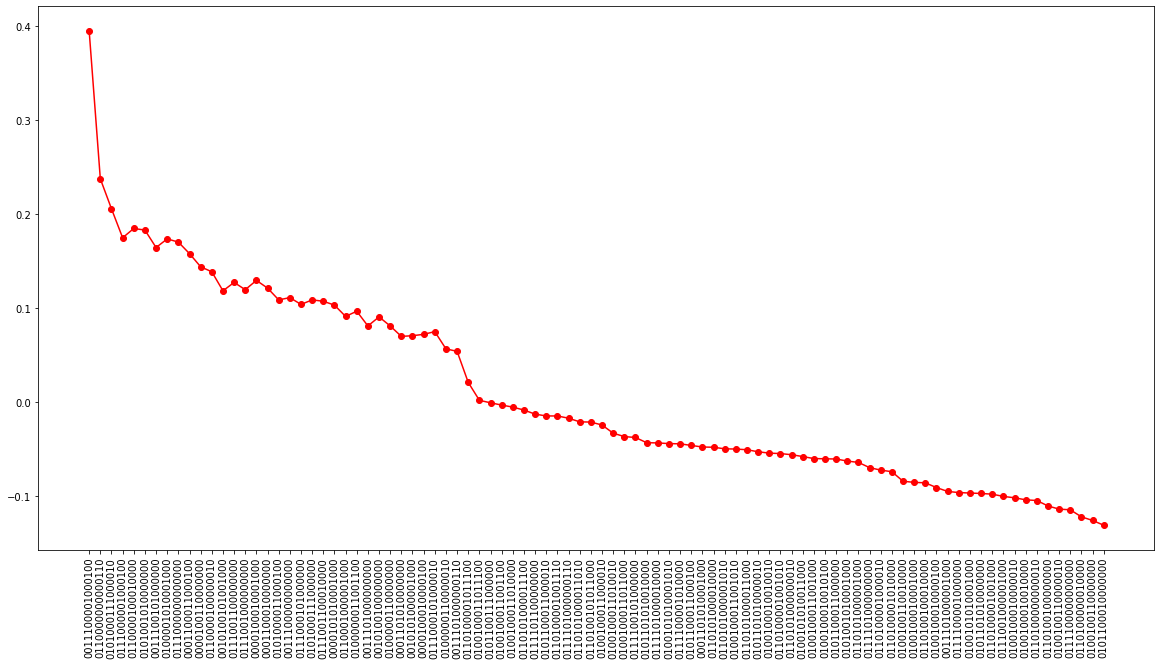

In [53]:
non_null_gt4 = gtrie4[gtrie4['z_n'] != 0]

with open('outputs/gtries_4_t_table_nn.tex','w') as tf:
    tf.write(non_null_gt4.to_latex(index=False))

plt.xticks(rotation=90)
plt.plot(non_null_gt4['Graph'], non_null_gt4['z_n'], 'ro-', label = 'Subgraph (n=4)')

In [54]:
non_null_gt4

,Graph,Org_Freq,z_score,Rnd_Avg,Rnd_Dev,z_n
0,0011100001000100,170,16.37,19.92,9.17,0.395137
1,0110000000000110,103,9.85,27.31,7.68,0.237758
2,0101000111000010,55,8.53,8.98,5.40,0.205896
3,0111000001000100,54,7.25,14.31,5.48,0.174999
4,0110000100010000,187,7.66,70.43,15.21,0.184896
...,...,...,...,...,...,...
87,0100100110000010,2,-4.72,41.17,8.30,-0.113931
88,0111100000000000,8,-4.75,103.40,20.07,-0.114655
89,0110100000010000,31,-5.06,185.57,30.57,-0.122138
90,0100100110000000,18,-5.22,203.26,35.51,-0.126000


# Modularity

## Empirical Communities


In [55]:
#https://stackoverflow.com/questions/70901680/networkx-create-graphs-from-communities
empirical_communities = [{'Seabirds','Minkle_whale','Common_dolphin','Striped_dolphin', 'Bottlenose_dolphin', 'Harbor_porpoise', 'Tunas', 'Rays'},
 {'Phytoplankton','Discards','Detritus','Import'},
 {'Hake','Squids','Benthic_cephalopods','Horse_mackerel','Blue_jack_mackerel','Chub_mackerel','Mackerel','Demersal_piscivorous_fish','Demersal_invertivorous_fish','Benthopelagic_piscivorous_fish',
  'Benthopelagic_invertivorous_fish','Flatfish','Sparids','Anchovy','Sardine','Bogue','Henslows_crab','Shrimps','Shrimps','Macrozoobenthos','Suprabenthic_invertebrates','Meso_and_Microzooplankton',
  'Macrozooplankton'}]

for c, v_c in enumerate(empirical_communities):
    for v in v_c:
        # Add 1 to save 0 for external edges
        H.nodes[v]['empirical_community'] = c + 1

'''Find internal edges and add their community to their attributes'''
for v, w, in H.edges:
    if H.nodes[v]['empirical_community'] == H.nodes[w]['empirical_community']:
        # Internal edge, mark with community
        H.edges[v, w]['empirical_community'] = H.nodes[v]['empirical_community']
    else:
        # External edge, mark as 0
        H.edges[v, w]['empirical_community'] = 0

<Figure size 80x60 with 0 Axes>

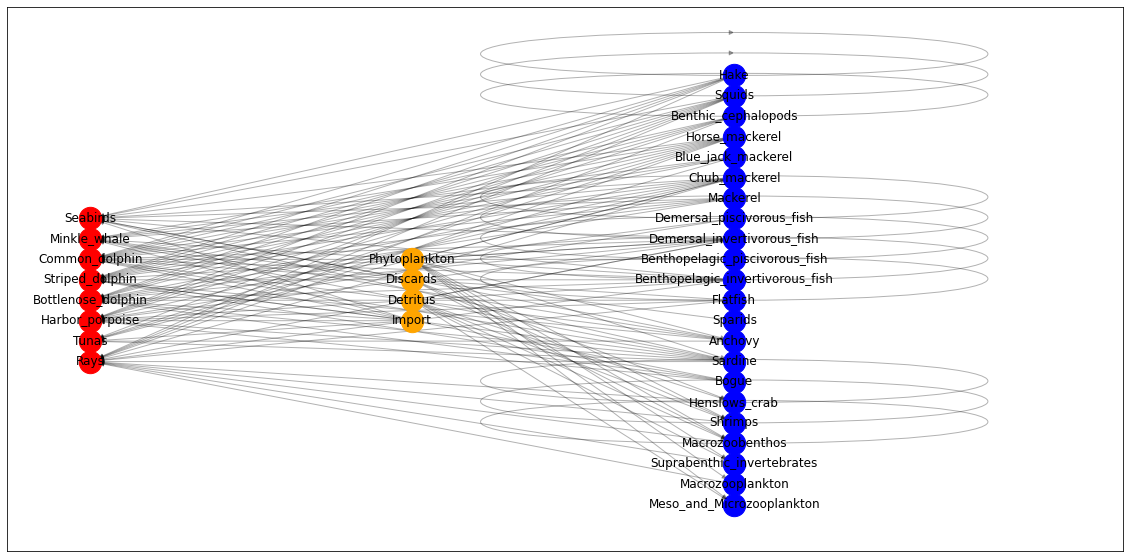

<Figure size 80x60 with 0 Axes>

In [56]:
# Draw the graph, but don't color the nodes
pos = nx.multipartite_layout(H, 'empirical_community')
#nx.draw(H, pos, edge_color='k', with_labels=True, font_weight='light', width= 0.9)
#nx.draw_networkx_nodes(H, pos)

#For each community list, draw the nodes, giving it a specific color.
size = 500
nx.draw_networkx_nodes(H, pos, nodelist=empirical_communities[0], node_color='r', node_size = size)
nx.draw_networkx_nodes(H, pos, nodelist=empirical_communities[1], node_color='orange', node_size = size)
nx.draw_networkx_nodes(H, pos, nodelist=empirical_communities[2], node_color='b', node_size = size)

nx.draw_networkx_edges(H, pos, alpha = 0.3)
nx.draw_networkx_labels(H, pos)


plt.figure(figsize=(8, 6), dpi=10)

# Louvain modularity

In [57]:
louvain = nx.algorithms.community.louvain_communities(H, seed = 123, resolution=0.9)
print(len(louvain))

7


In [58]:
#https://stackoverflow.com/questions/70901680/networkx-create-graphs-from-communities
communities = sorted(louvain, key=len, reverse=True)

for c, v_c in enumerate(communities):
    for v in v_c:
        # Add 1 to save 0 for external edges
        H.nodes[v]['community'] = c + 1

'''Find internal edges and add their community to their attributes'''
for v, w, in H.edges:
    if H.nodes[v]['community'] == H.nodes[w]['community']:
        # Internal edge, mark with community
        H.edges[v, w]['community'] = H.nodes[v]['community']
    else:
        # External edge, mark as 0
        H.edges[v, w]['community'] = 0

<Figure size 8x6 with 0 Axes>

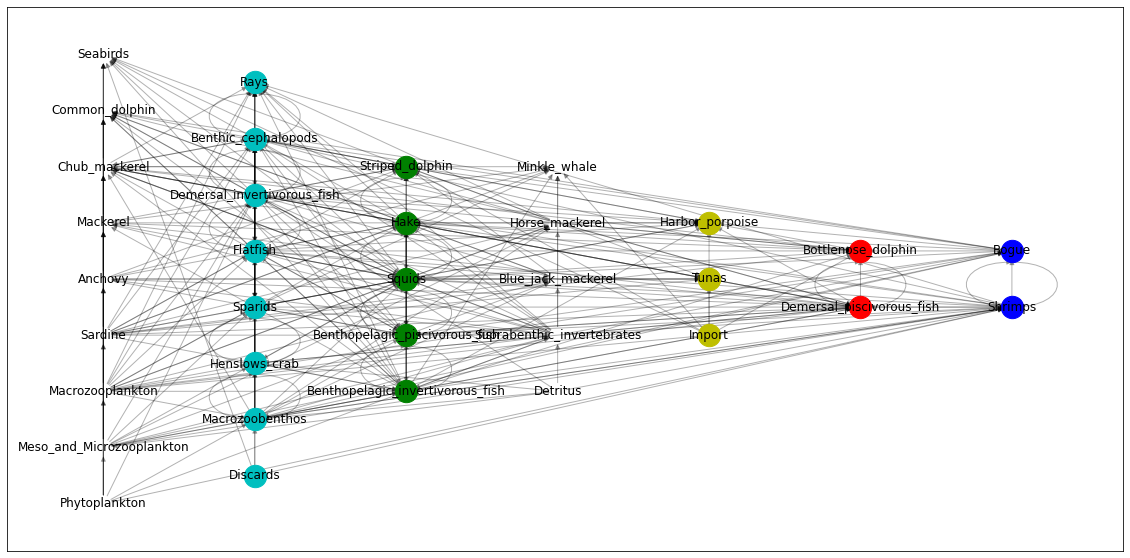

<Figure size 8x6 with 0 Axes>

In [59]:
# Draw the graph, but don't color the nodes
pos = nx.multipartite_layout(H, 'community')
#nx.draw(H, pos, edge_color='k', with_labels=True, font_weight='light', width= 0.9)
#nx.draw_networkx_nodes(H, pos)

#For each community list, draw the nodes, giving it a specific color.
size = 500
nx.draw_networkx_nodes(H, pos, nodelist=louvain[0], node_color='r', node_size = size)
nx.draw_networkx_nodes(H, pos, nodelist=louvain[1], node_color='y', node_size = size)
nx.draw_networkx_nodes(H, pos, nodelist=louvain[2], node_color='g', node_size = size)
nx.draw_networkx_nodes(H, pos, nodelist=louvain[3], node_color='b', node_size = size)
nx.draw_networkx_nodes(H, pos, nodelist=louvain[4], node_color='c', node_size = size)
nx.draw_networkx_edges(H, pos, alpha = 0.3)
nx.draw_networkx_labels(H, pos)


plt.figure(figsize=(8, 6), dpi=1)